### PULA TECHNICAL ASSESSMENT
The purpose of this exercise is threefold:
  1. Analyze the provided data and construct a model.
  2. Systematically document your approach and methodology, ensuring that it's comprehensible for both a fellow candidate and a senior analyst.
  3. Critically evaluate the methods employed and the resulting outputs.


### Import the necessary libraries

In [1]:
#!pip install numpy-financial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import numpy_financial as npf
warnings.filterwarnings("ignore")

### Read the data to a Pandas DataFrame and perform Explaratory Data Analysis

In [3]:
data = pd.read_excel("data.xlsx",skiprows=2) 
## I noticed when I performed the pd.read_excel, the columns were pushed down 2 rows so I used the skiprows
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [4]:
#data information such as data types and number and name of rows and columns present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [5]:
#statistical description
data.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


In [6]:
##checking for null values
data.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [7]:
##how many columns does the datset have?
data.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

#### Question 1
(i)	Carry out checks on the data provided to confirm that the data is complete and fit for use. This should include:

• Creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day, i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.

In [8]:
## The Date/hour start column is already in datetime format so we have to extract the hour from it.
data['Hour'] = data['Date/hour start'].dt.hour

In [9]:
# Calculate the average solar electricity generation and electricity usage for each hour
average_generation = data.groupby('Hour')['Solar electricity generation (kWh)'].mean()
average_usage = data.groupby('Hour')['Electricity usage (kWh)'].mean()

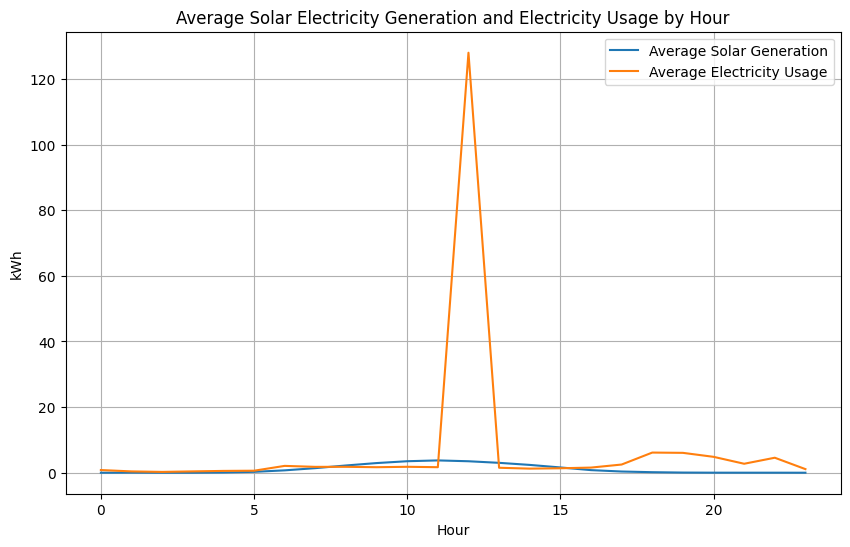

In [10]:
# Create the graph for the average generation usage for each hour
plt.figure(figsize=(10, 6))
plt.plot(average_generation, label='Average Solar Generation')
plt.plot(average_usage, label='Average Electricity Usage')
plt.xlabel('Hour')
plt.ylabel('kWh')
plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.legend()
plt.grid(True)
plt.show()



•	investigating any significant outliers.

•	making any corrections that are needed.

In [11]:
### Finding the outliers
solar = stats.zscore(data['Solar electricity generation (kWh)'])
usage = stats.zscore(data['Electricity usage (kWh)'])

# Find data points with Z-score above a certain threshold (e.g., 3)
outliers_solar = data[abs(solar) > 3]
outliers_usage = data[abs(usage) > 3]

# Print and analyze outliers
print("Outliers in Solar Generation and in Electricity Usage:")
outliers_solar
outliers_usage

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Outliers in Solar Generation and in Electricity Usage:


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
276,12,2020-01-12 12:00:00,5.214,46000.0


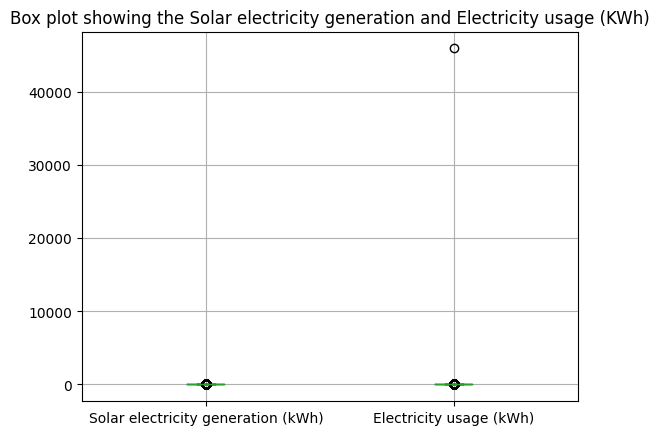

In [12]:
## Plot the outliers we found earlier, I'll use a boxplot, because it's easier to help investigate outliers
data.boxplot(column= ['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title('Box plot showing the Solar electricity generation and Electricity usage (KWh)')
plt.show()

In [13]:
###Identify and remove outliers
def identify_outliers(column): 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    IRQ  = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IRQ 
    
    upper_bound = Q3 + 1.5 * IRQ 
    
    return (column < lower_bound) | (column > upper_bound)
outlier_mask = identify_outliers(data['Solar electricity generation (kWh)'])
data  = data[~outlier_mask]

outlier_mask = identify_outliers(data['Electricity usage (kWh)'])
data  = data[~outlier_mask]

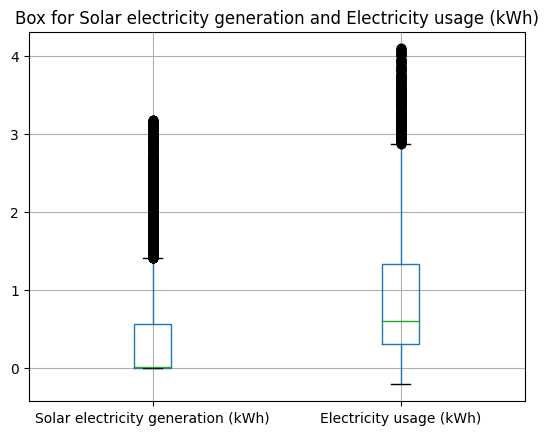

In [14]:
#Investigate outliers 
data.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

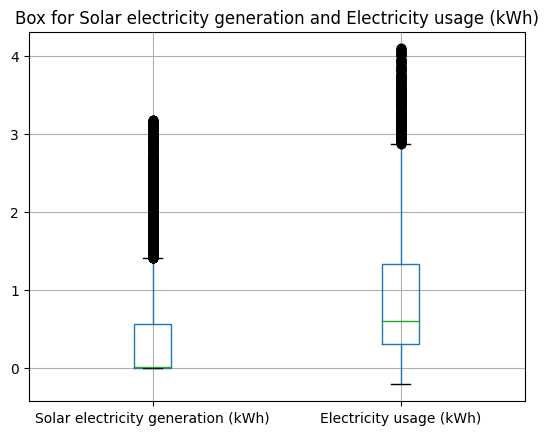

In [15]:
#Investigate outliers 
data.boxplot(column=['Solar electricity generation (kWh)', 'Electricity usage (kWh)'])
plt.title("Box for Solar electricity generation and Electricity usage (kWh)")
plt.show()

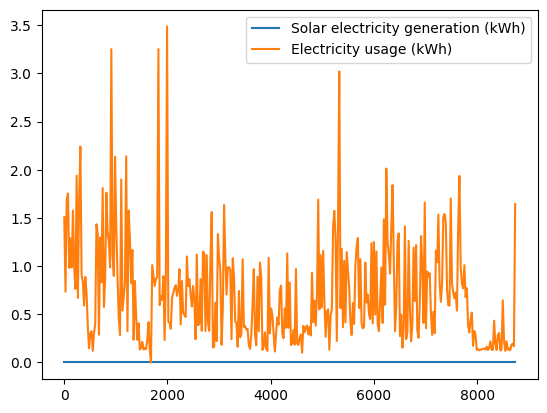

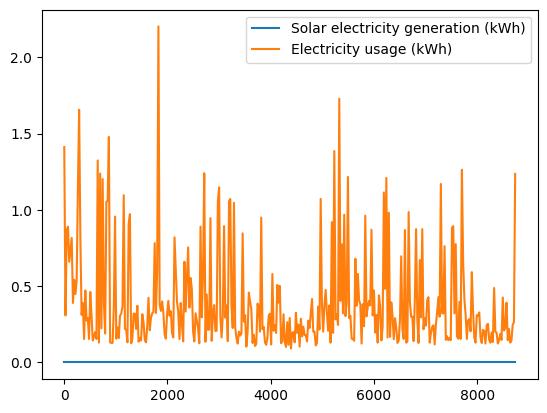

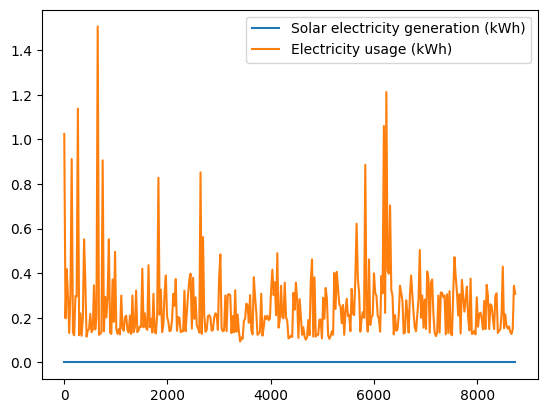

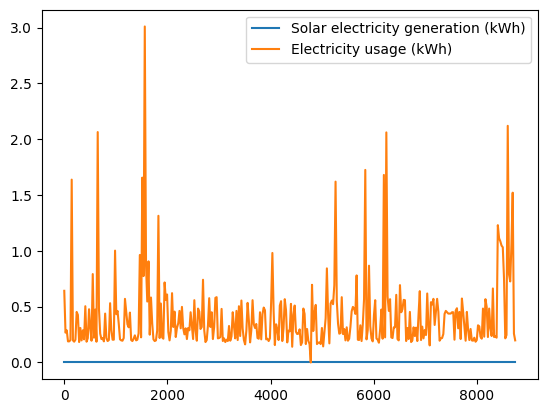

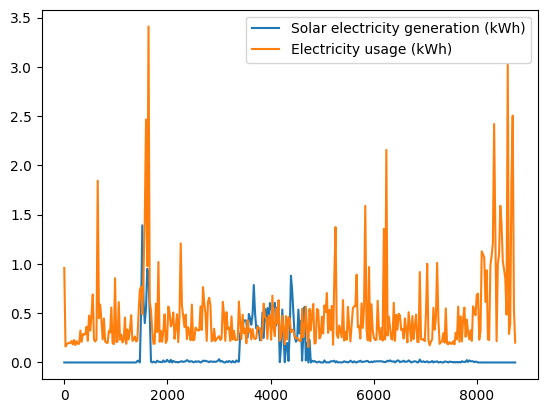

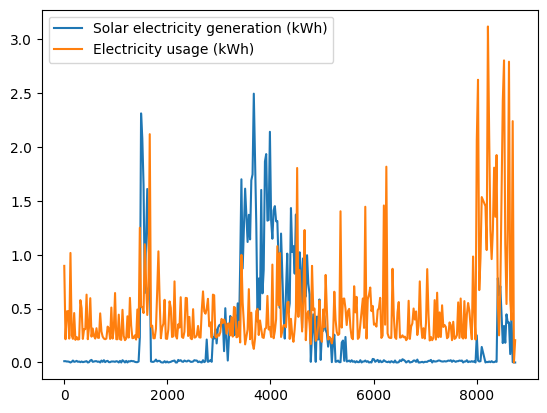

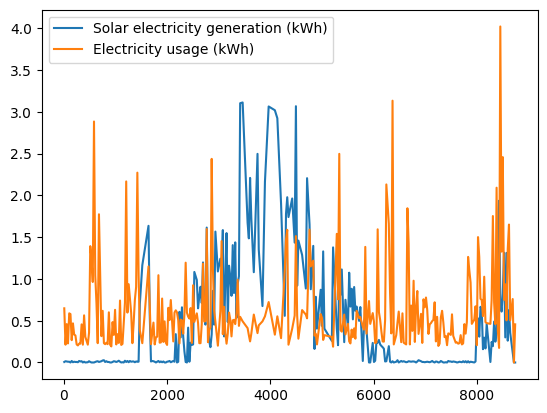

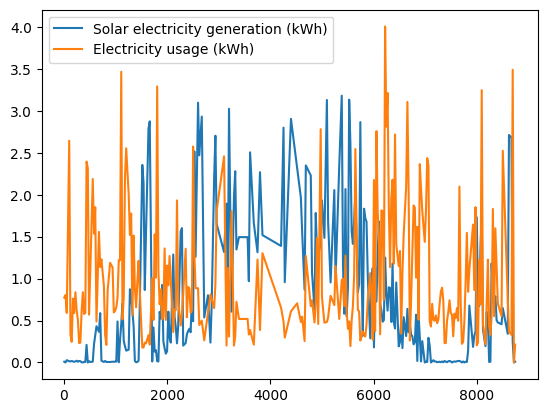

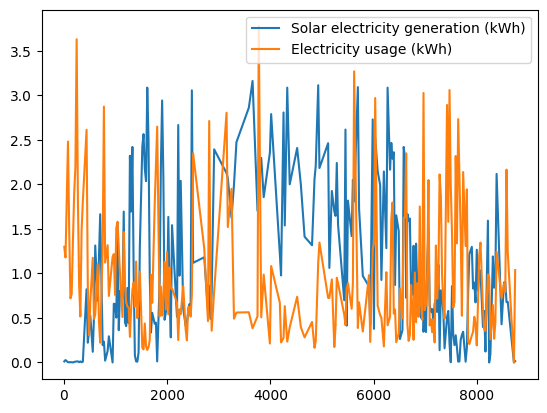

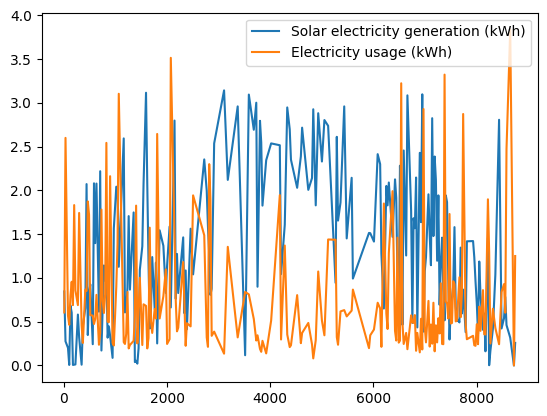

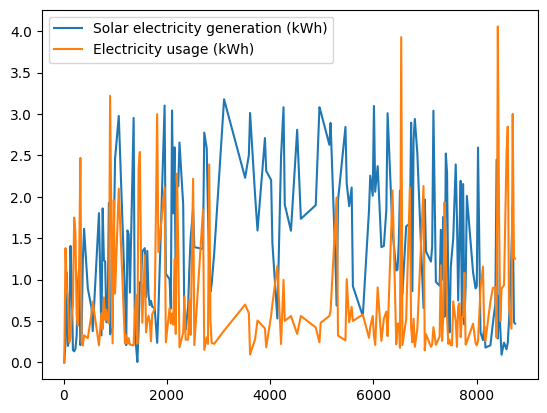

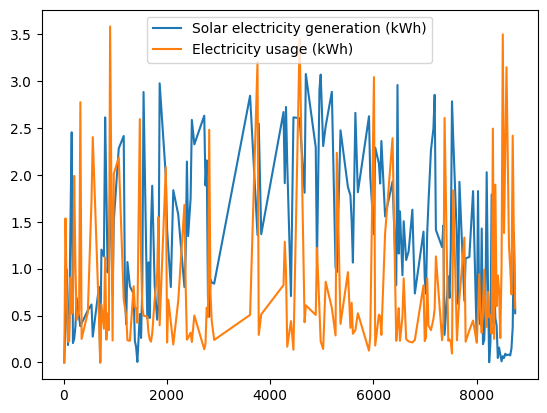

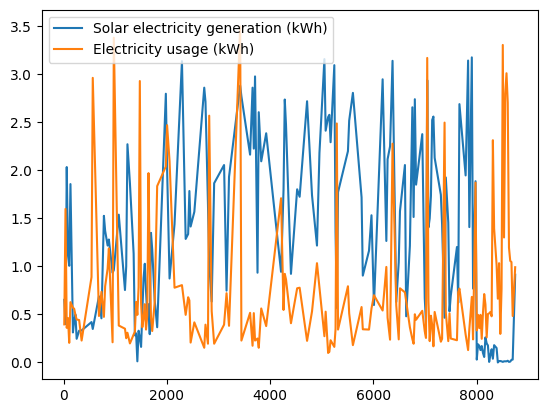

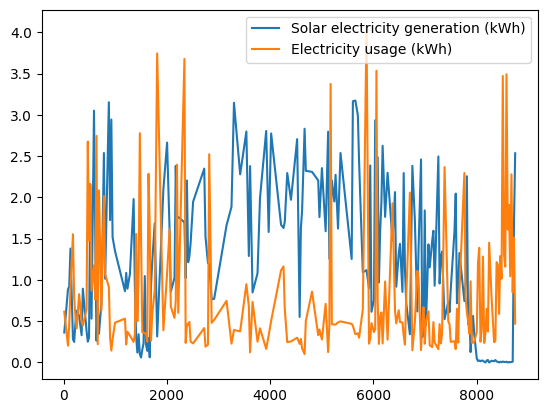

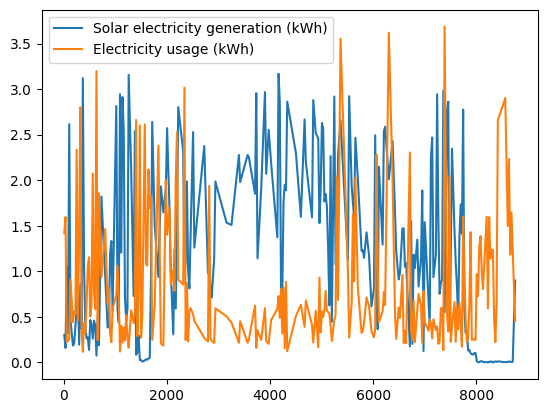

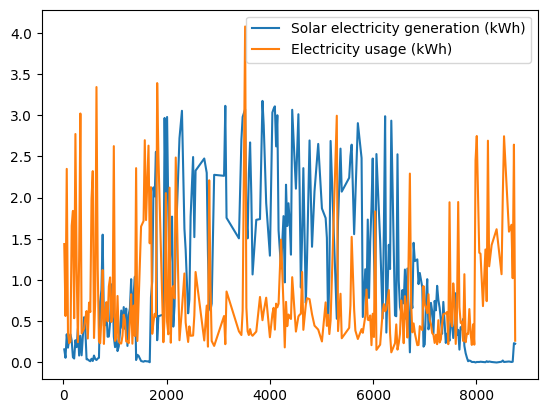

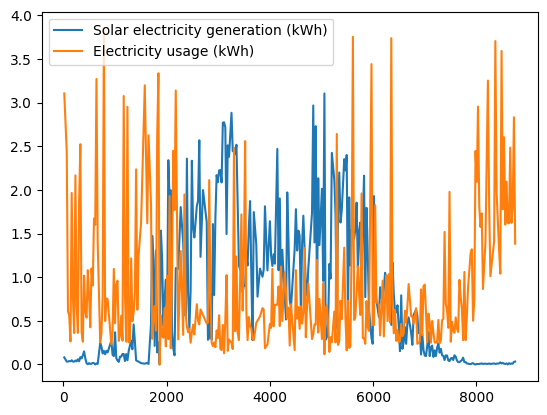

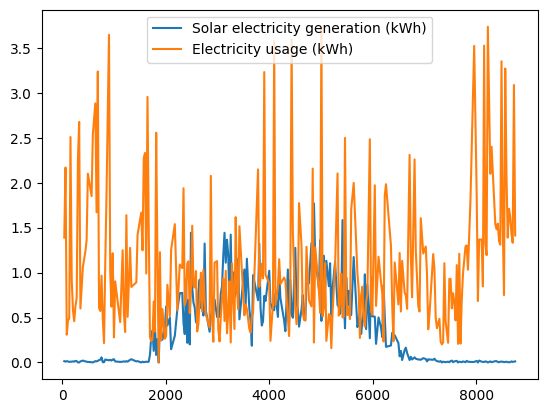

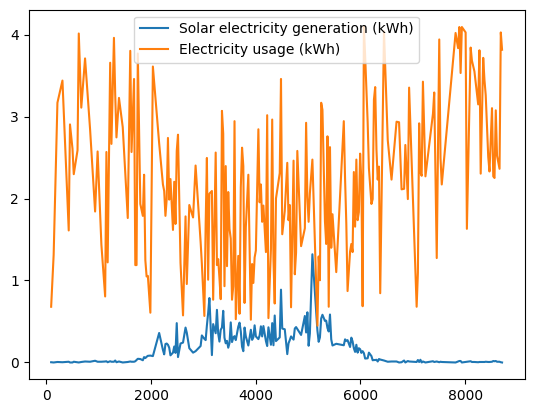

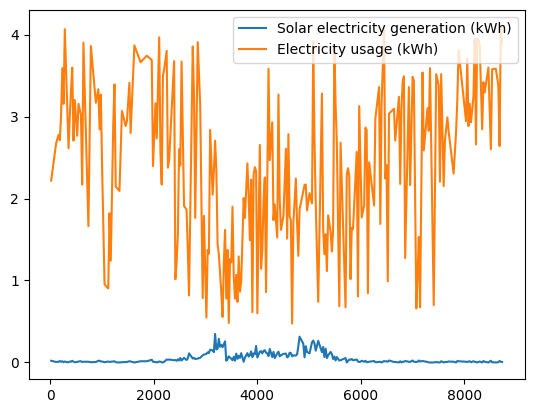

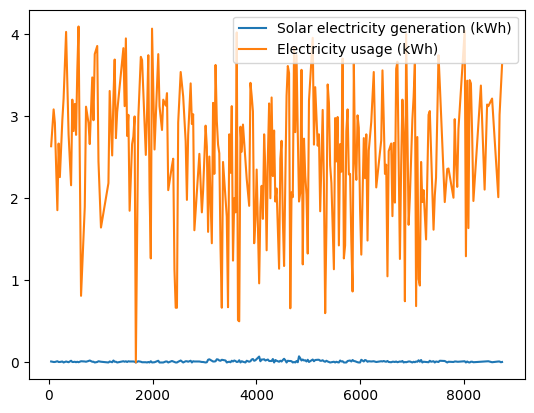

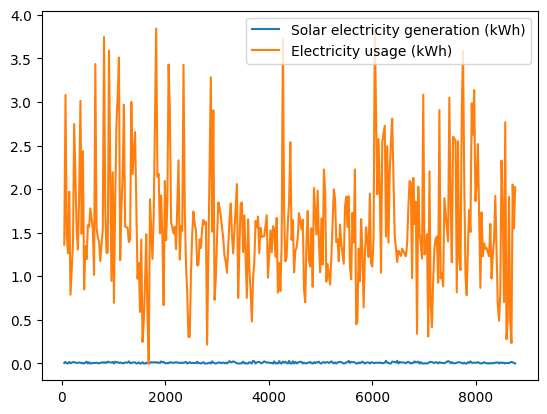

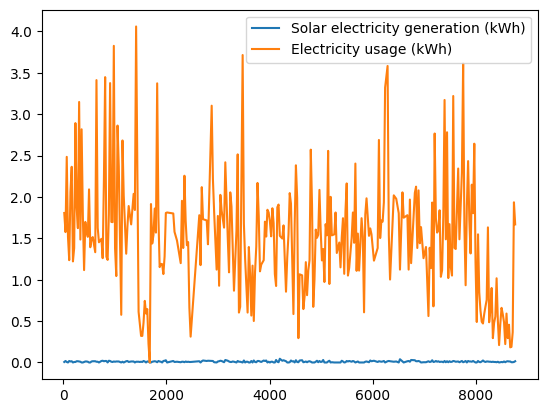

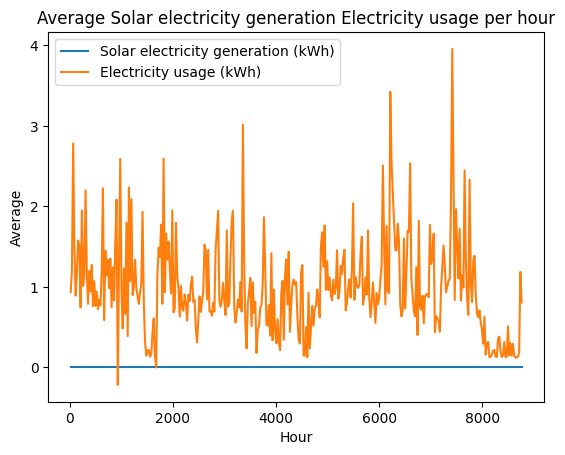

In [16]:
#### Print average values for all 24 hours individually, 
hourly_avg_cleaned = data.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']]
hourly_avg_cleaned.plot(kind="line")
plt.xlabel("Hour")
plt.ylabel("Average") 
plt.title("Average Solar electricity generation Electricity usage per hour") 
plt.show()

#### Question 2
(ii) Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).	

In [17]:
data['Electricity bought (kWh)'] = data['Electricity usage (kWh)'] - data['Solar electricity generation (kWh)']

# Print the calculated values higher than zero
data[data['Electricity bought (kWh)'] > 0][['Hour', 'Electricity bought (kWh)']]

,Hour,Electricity bought (kWh)
0,0,1.509849
1,1,1.411859
2,2,1.023898
3,3,0.642000
4,4,0.960000
...,...,...
8752,16,1.350000
8753,17,1.401000
8757,21,2.022000
8758,22,1.653000


##### Question 3
(iii)	Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).

In [18]:
data['Excess Solar Electricity (kWh)'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']

# Print the calculated values higher than zero
data[data['Excess Solar Electricity (kWh)'] > 0][['Hour', 'Excess Solar Electricity (kWh)']]

,Hour,Excess Solar Electricity (kWh)
9,9,0.240
12,12,0.255
58,10,0.189
59,11,0.267
60,12,1.671
...,...,...
8674,10,0.921
8723,11,0.123
8725,13,0.129
8749,13,2.064


##### Question 4
(iv)	Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.

The battery charge level should:

•	begin at zero at 1 January 2020 00:00.

•	allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).

•	be subject to the cap on the maximum battery charge level.


In [19]:
# Initialize variables
battery_charge = 0
max_battery_charge = 12.5
battery_charge_levels = []

# Iterate over each row in the data
for index, row in data.iterrows():
    solar_generation = row['Solar electricity generation (kWh)']
    electricity_usage = row['Electricity usage (kWh)']
    
    # Calculate the excess electricity
    excess_electricity = solar_generation - electricity_usage
    
    # Store excess electricity in the battery if it's not full
    if excess_electricity > 0 and battery_charge < max_battery_charge:
        battery_charge += excess_electricity
    
    # Limit the battery charge level to the maximum capacity
    battery_charge = min(battery_charge, max_battery_charge)
    
    # Append the current battery charge level to the list
    battery_charge_levels.append(battery_charge)
    
# Add the battery charge levels to the DataFrame
data['Battery charge level (kWh)'] = battery_charge_levels

##### Question 5
(v)	Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.	

In [20]:
# Initialize variables
electricity_from_provider = []
min_electricity_usage = 0

# Iterate over each row in the data
for index, row in data.iterrows():
    solar_generation = row['Solar electricity generation (kWh)']
    electricity_usage = row['Electricity usage (kWh)']
    battery_charge = row['Battery charge level (kWh)']
    
    # Calculate the electricity bought from the provider
    electricity_from_provider.append(max(electricity_usage - solar_generation - battery_charge, min_electricity_usage))
    
# Add the electricity from the provider to the DataFrame
data['Electricity from provider (kWh)'] = electricity_from_provider
data['Electricity from provider (kWh)']

0       1.509849
1       1.411859
2       1.023898
3       0.642000
4       0.960000
          ...   
8752    0.000000
8753    0.000000
8757    0.000000
8758    0.000000
8759    0.000000
Name: Electricity from provider (kWh), Length: 6782, dtype: float64

In [21]:
savings = 0
battery_charge = 0
electricity_price = 0.17

# Iterate over each hour
for index, row in data.iterrows():
    excess_generation = row['Solar electricity generation (kWh)'] - row['Electricity usage (kWh)']
    
    # Check if there is excess generation to charge the battery
    if excess_generation > 0:
        # Calculate the new battery charge level
        battery_charge = min(battery_charge + excess_generation, max_battery_charge)
    
    # Calculate the electricity from the provider
    electricity_from_provider = max(row['Electricity usage (kWh)'] - battery_charge, 0)
    
    # Calculate the cost of electricity from the provider
    cost_from_provider = electricity_from_provider * electricity_price
    
    # Update the total savings
    savings += cost_from_provider

print("Savings over 2020: $", round(savings, 2))


Savings over 2020: $ 5.56


##### Question 6

(vii)	Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:


•	monthly solar generation.

•	monthly electricity usage.

•	monthly electricity purchased from the electricity provider (no battery).

•	monthly electricity purchased from the electricity provider (with battery).


In [22]:
# Convert the 'Date/hour start' column to datetime format
data['Date/hour start'] = pd.to_datetime(data['Date/hour start'])

# Extract the month from the 'Date/hour start' column
data['Month'] = data['Date/hour start'].dt.month
# Calculate the monthly solar generation
monthly_solar_generation = data.groupby('Month')['Solar electricity generation (kWh)'].sum()
# Calculate the monthly electricity usage
monthly_electricity_usage = data.groupby('Month')['Electricity usage (kWh)'].sum()
# Calculate the monthly electricity purchased from the provider (without battery)
monthly_electricity_from_provider_no_battery = data.groupby('Month')['Electricity usage (kWh)'].sum() - data.groupby('Month')['Solar electricity generation (kWh)'].sum()

# Calculate the monthly electricity purchased from the provider (with battery)
battery_charge = 0
max_battery_charge = 12.5
monthly_electricity_from_provider_with_battery = []

# Iterate over each month
for month in range(1, 13):
    month_data = data[data['Month'] == month]
    battery_charge = 0
    electricity_from_provider_with_battery = 0
    
    # Iterate over each hour in the month
    for index, row in month_data.iterrows():
        excess_generation = row['Solar electricity generation (kWh)'] - row['Electricity usage (kWh)']
        
        # Check if there is excess generation to charge the battery
        if excess_generation > 0:
            # Calculate the new battery charge level
            battery_charge = min(battery_charge + excess_generation, max_battery_charge)
        
        # Calculate the electricity from the provider
        electricity_from_provider = max(row['Electricity usage (kWh)'] - battery_charge, 0)
        electricity_from_provider_with_battery += electricity_from_provider
    
    monthly_electricity_from_provider_with_battery.append(electricity_from_provider_with_battery)

In [23]:
monthly_data = pd.DataFrame({
    'Month': range(1,13),
    'Solar Generation (KWh)': monthly_solar_generation.values,
    'Electricity Usage(KWh)': monthly_electricity_usage.values,
    'Electricity from Provider (No Battery) (KWh)': monthly_electricity_from_provider_no_battery.values,
    'Electricity from provider (With Battery)(KWh)': monthly_electricity_from_provider_with_battery
})

monthly_data.set_index('Month', inplace=True)

print(monthly_data)

       Solar Generation (KWh)  Electricity Usage(KWh)  \
Month                                                   
1                     110.325              675.819181   
2                     175.416              533.812610   
3                     245.766              611.187868   
4                     270.009              486.819574   
5                     287.664              420.124409   
6                     342.585              420.546738   
7                     337.965              447.505521   
8                     330.111              500.277651   
9                     285.921              588.616427   
10                    247.119              526.418876   
11                    177.273              564.788569   
12                    104.523              717.292595   

       Electricity from Provider (No Battery) (KWh)  \
Month                                                 
1                                        565.494181   
2                                   

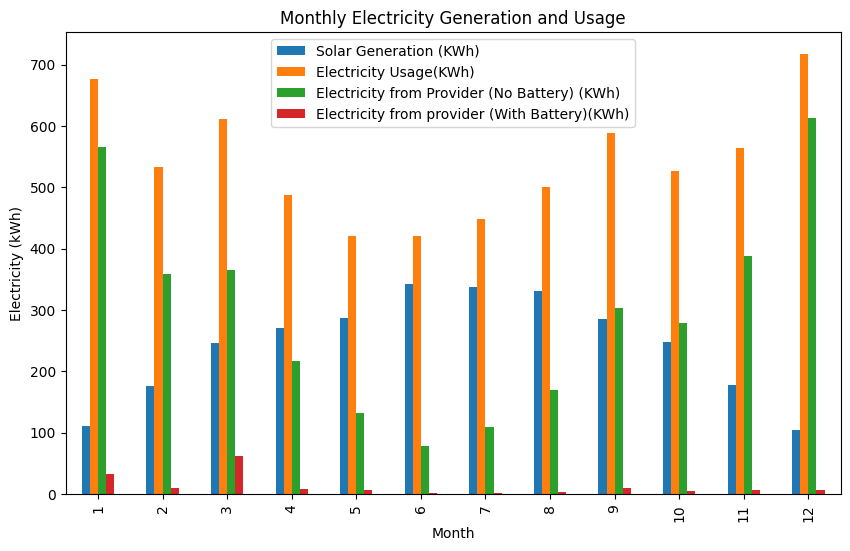

In [24]:
# Plot the monthly data
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Electricity (kWh)')
plt.title('Monthly Electricity Generation and Usage')
plt.legend()
plt.show()


##### Question 7
Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios below.

In [25]:
def calculate_future_savings(initial_savings, annual_increase, num_years):
    future_savings = []
    savings = initial_savings
    for year in range(num_years):
        future_savings.append(savings)
        savings *= (1 + annual_increase)
    return future_savings

def calculate_npv(future_savings, discount_rate):
    npv = 0
    for year, savings in enumerate(future_savings):
        npv += savings / ((1 + discount_rate) ** (year + 1))
    return npv
# Scenario 1: Electricity prices increase by 4% p.a.
initial_savings_scenario1 = 1000  # Initial annual savings
annual_increase_scenario1 = 0.04  # Annual increase in electricity prices
num_years = 20  # Number of years

future_savings_scenario1 = calculate_future_savings(initial_savings_scenario1, annual_increase_scenario1, num_years)
npv_scenario1 = calculate_npv(future_savings_scenario1, 0.05)  # Assuming a discount rate of 5%

print("Scenario 1:")
print("Future Annual Savings:", future_savings_scenario1)
print("Net Present Value:", npv_scenario1)

Scenario 1:
Future Annual Savings: [1000, 1040.0, 1081.6000000000001, 1124.8640000000003, 1169.8585600000004, 1216.6529024000004, 1265.3190184960004, 1315.9317792358404, 1368.569050405274, 1423.311812421485, 1480.2442849183444, 1539.4540563150783, 1601.0322185676814, 1665.0735073103888, 1731.6764476028045, 1800.9435055069168, 1872.9812457271935, 1947.9004955562814, 2025.8165153785328, 2106.849175993674]
Net Present Value: 17418.87317110706


In [26]:
# Scenario 1: Electricity prices increase by 4% p.a.
initial_savings_scenario1 = 1000  # Initial annual savings
annual_increase_scenario1 = 0.04  # Annual increase in electricity prices
num_years = 20  # Number of years

future_savings_scenario1 = calculate_future_savings(initial_savings_scenario1, annual_increase_scenario1, num_years)
npv_scenario1 = calculate_npv(future_savings_scenario1, 0.05)  # Assuming a discount rate of 5%

print("Scenario 1:")
print("Future Annual Savings:", future_savings_scenario1)
print("Net Present Value:", npv_scenario1)

Scenario 1:
Future Annual Savings: [1000, 1040.0, 1081.6000000000001, 1124.8640000000003, 1169.8585600000004, 1216.6529024000004, 1265.3190184960004, 1315.9317792358404, 1368.569050405274, 1423.311812421485, 1480.2442849183444, 1539.4540563150783, 1601.0322185676814, 1665.0735073103888, 1731.6764476028045, 1800.9435055069168, 1872.9812457271935, 1947.9004955562814, 2025.8165153785328, 2106.849175993674]
Net Present Value: 17418.87317110706


In [27]:
# Scenario 2: Electricity prices increase by 4% p.a. and rise by an additional 0.25% p.a.
initial_savings_scenario2 = 1000  # Initial annual savings
annual_increase_scenario2 = 0.04  # Annual increase in electricity prices
additional_increase_scenario2 = 0.0025  # Additional annual increase
num_years = 20  # Number of years

future_savings_scenario2 = calculate_future_savings(initial_savings_scenario2, annual_increase_scenario2, num_years)
for year in range(num_years):
    future_savings_scenario2[year] *= (1 + additional_increase_scenario2 * year)
npv_scenario2 = calculate_npv(future_savings_scenario2, 0.05)  # Assuming a discount rate of 5%

print("\nScenario 2:")
print("Future Annual Savings:", future_savings_scenario2)
print("Net Present Value:", npv_scenario2)



Scenario 2:
Future Annual Savings: [1000.0, 1042.6, 1087.008, 1133.3004800000003, 1181.5571456000005, 1231.8610636800004, 1284.2988037734403, 1338.9605853724677, 1395.9404314133797, 1455.3363282009684, 1517.2503920413028, 1581.7890428637431, 1649.063185124712, 1719.1883962979764, 1792.2851232689025, 1868.4788869634265, 1947.9004955562814, 2030.6862666174234, 2116.9782585705666, 2206.924511853374]
Net Present Value: 17818.723854150252


##### Question 9
(ix)	Calculate the Internal Rate of Return (IRR) for the two scenarios in part (viii) by determining the discount rate that equates the net present value of the future annual savings to the initial cost of the battery for each scenario.	

[Note: All scenarios outlined above should be modelled separately in your model. The user should not need to change the parameters to see the results.]


In [28]:
# Scenario 1 parameters
initial_cost = 7000
annual_savings = 500

# Calculate the IRR
cash_flows = [-initial_cost] + [annual_savings] * 10
irr_scenario1 = npf.irr(cash_flows)

print("IRR for Scenario 1:", irr_scenario1)


IRR for Scenario 1: -0.056923621263314406


In [29]:
# Scenario 2 parameters
initial_cost = 2000
annual_savings = 300

# Calculate the IRR
cash_flows = [-initial_cost] + [annual_savings] * 10
irr_scenario2 = npf.irr(cash_flows)

print("IRR for Scenario 2  :", irr_scenario2)
 

IRR for Scenario 2  : 0.08144165646436607
